In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
import itertools
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Loan_Approval.csv")
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [ ]:
df.shape

(5960, 13)

In [ ]:
description= df.describe(include='all')
description

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [ ]:
data_types=df.dtypes
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [ ]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
MissingData

,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


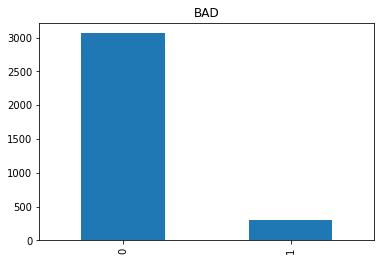

In [ ]:
df["BAD"].value_counts().plot.bar(title='BAD')

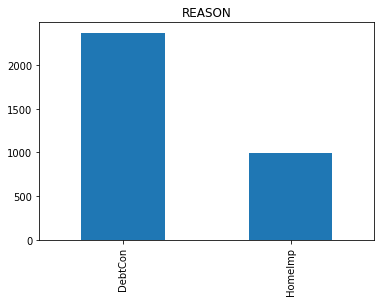

In [ ]:
REASON_count= df["REASON"].value_counts().rename_axis('REASON').reset_index(name='Total Count')
df["REASON"].value_counts().plot.bar(title='REASON')

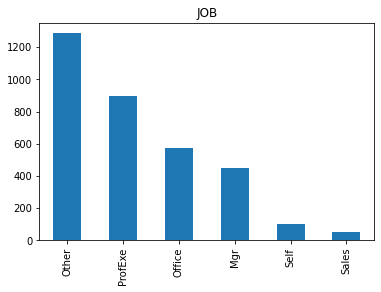

In [ ]:
JOB_count= df["JOB"].value_counts().rename_axis('JOB').reset_index(name='Total Count')
df["JOB"].value_counts().plot.bar(title='JOB')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

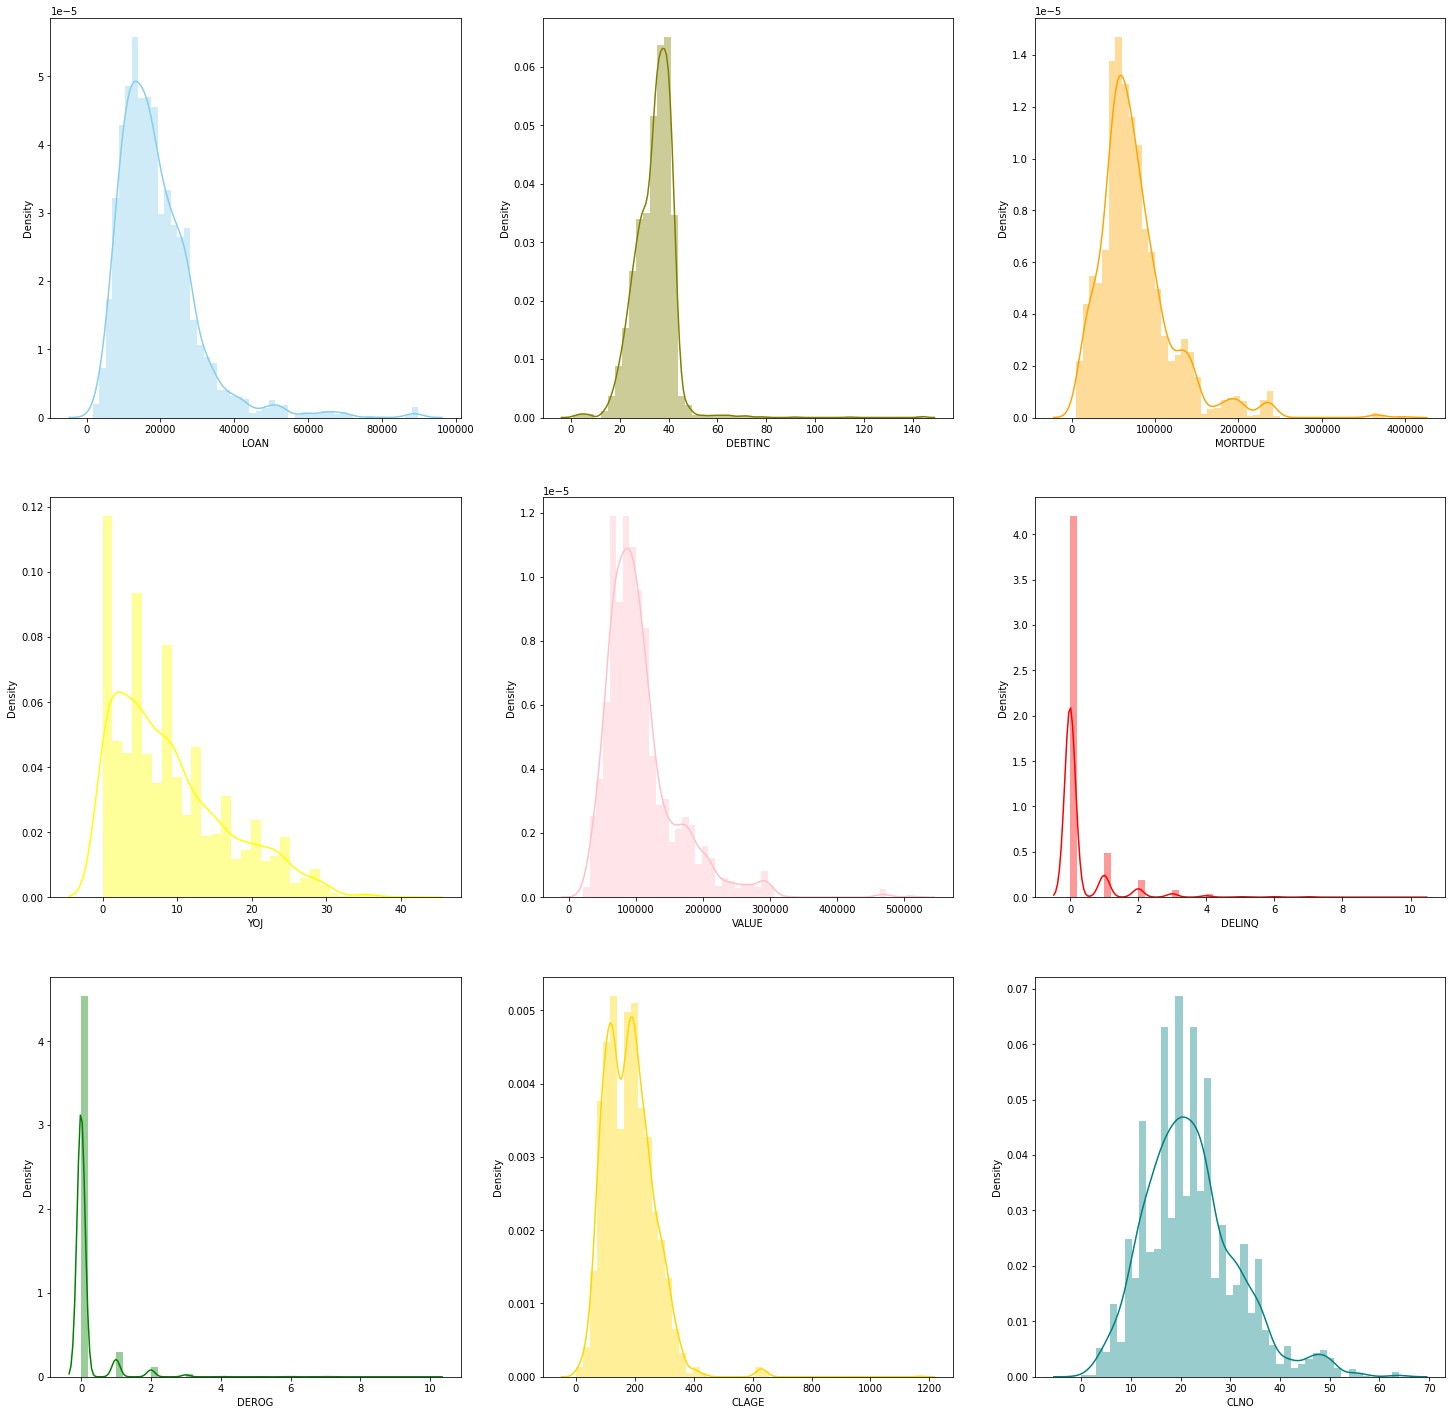

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["LOAN"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="olive", ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="orange", ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["VALUE"] , color="pink", ax=axes[1, 1])
sns.distplot( df["DELINQ"] , color="red", ax=axes[1, 2])
sns.distplot( df["DEROG"] , color="green", ax=axes[2, 0])
sns.distplot( df["CLAGE"] , color="gold", ax=axes[2, 1])
sns.distplot( df["CLNO"] , color="teal", ax=axes[2, 2])

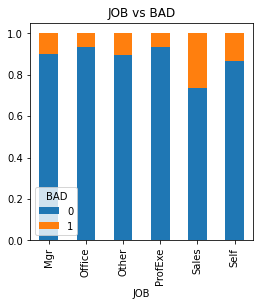

In [ ]:
JOB=pd.crosstab(df['JOB'],df['BAD'])
JOB.div(JOB.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='JOB vs BAD', figsize=(4,4))

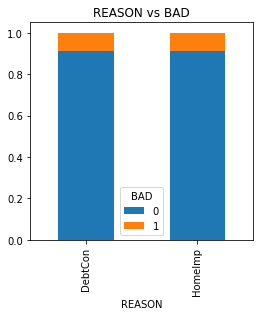

In [ ]:
REASON=pd.crosstab(df['REASON'],df['BAD'])
REASON.div(REASON.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='REASON vs BAD', figsize=(4,4))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

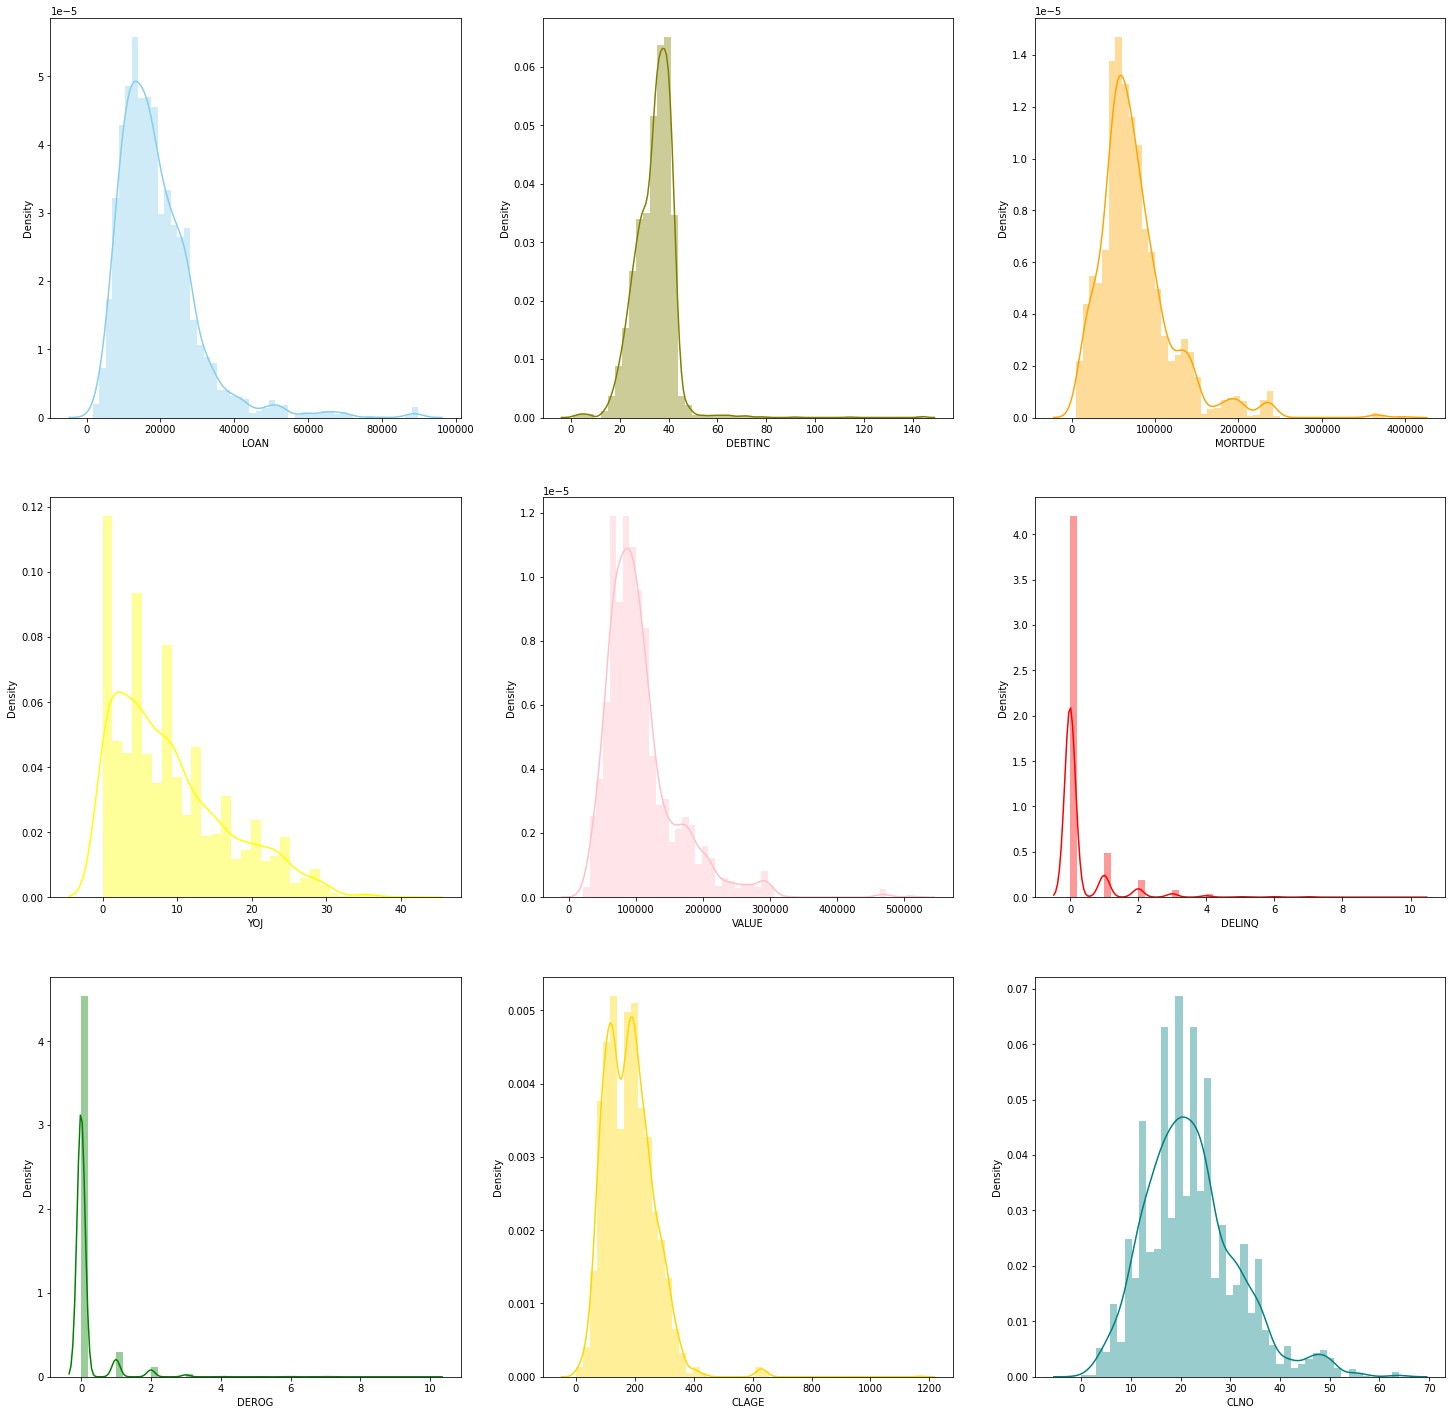

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["LOAN"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="olive", ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="orange", ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["VALUE"] , color="pink", ax=axes[1, 1])
sns.distplot( df["DELINQ"] , color="red", ax=axes[1, 2])
sns.distplot( df["DEROG"] , color="green", ax=axes[2, 0])
sns.distplot( df["CLAGE"] , color="gold", ax=axes[2, 1])
sns.distplot( df["CLNO"] , color="teal", ax=axes[2, 2])

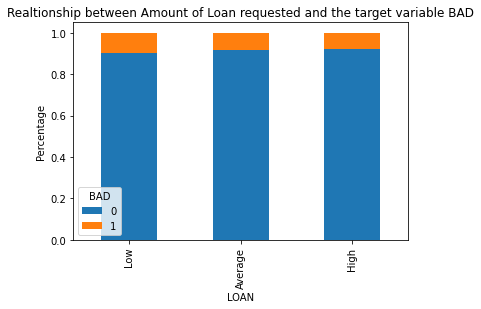

In [ ]:
dfWithBin = df.copy()
bins=[0,15000,25000,90000] 
group=['Low','Average','High'] 
dfWithBin['LOAN_bin']=pd.cut(df['LOAN'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['LOAN_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Realtionship between Amount of Loan requested and the target variable BAD')
plt.xlabel('LOAN')
P= plt.ylabel('Percentage')

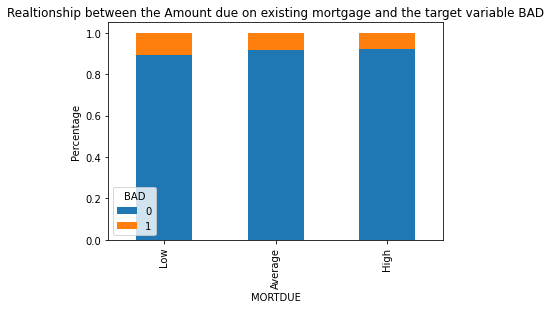

In [ ]:
bins=[0,47000,92000,400000] 
group=['Low','Average','High'] 
dfWithBin['MORTDUE_bin']=pd.cut(dfWithBin['MORTDUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['MORTDUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Realtionship between the Amount due on existing mortgage and the target variable BAD')
plt.xlabel('MORTDUE')
P= plt.ylabel('Percentage')

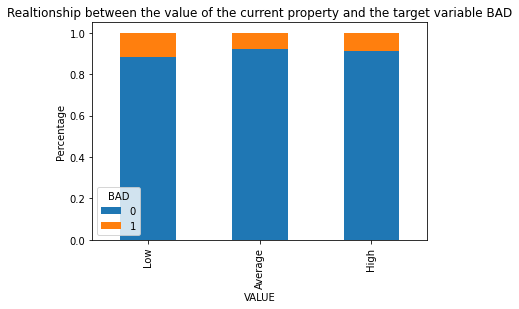

In [ ]:
bins=[0,68000,120000,860000] 
group=['Low','Average','High'] 
dfWithBin['VALUE_bin']=pd.cut(dfWithBin['VALUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['VALUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Realtionship between the value of the current property and the target variable BAD')
plt.xlabel('VALUE')
P= plt.ylabel('Percentage')

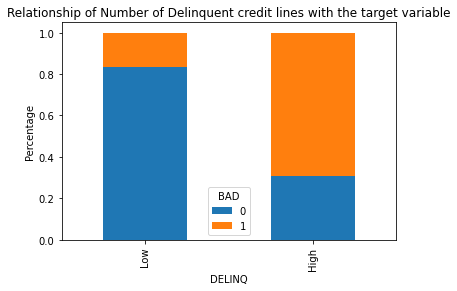

In [ ]:
bins=[0,3,15] 
group=['Low','High'] 
dfWithBin['DELINQ_bin']=pd.cut(dfWithBin['DELINQ'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship of Number of Delinquent credit lines with the target variable')
plt.xlabel('DELINQ')
P= plt.ylabel('Percentage')

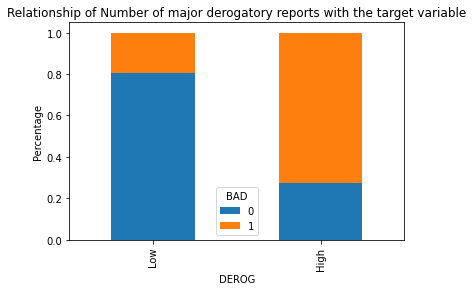

In [ ]:
bins=[0,2,15] 
group=['Low','High'] 
dfWithBin['DEROG_bin']=pd.cut(dfWithBin['DEROG'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DEROG_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship of Number of major derogatory reports with the target variable')
plt.xlabel('DEROG')
P= plt.ylabel('Percentage')

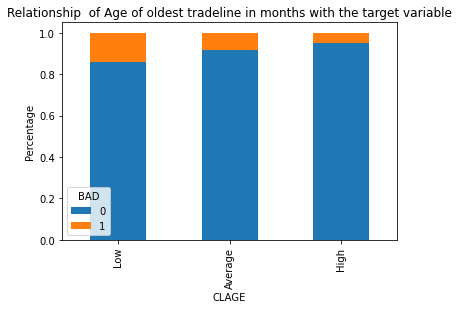

In [ ]:
bins=[0,120,230,1170] 
group=['Low','Average','High'] 
dfWithBin['CLAGE_bin']=pd.cut(dfWithBin['CLAGE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['CLAGE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship  of Age of oldest tradeline in months with the target variable')
plt.xlabel('CLAGE')
P= plt.ylabel('Percentage')

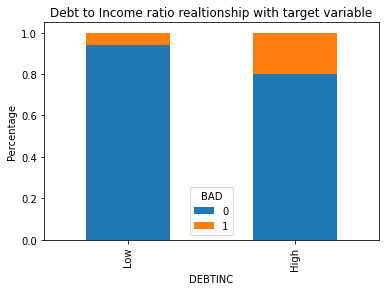

In [ ]:
bins=[0,40,204] 
group=['Low','High'] 
dfWithBin['DEBTINC_bin']=pd.cut(dfWithBin['DEBTINC'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DEBTINC_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Debt to Income ratio realtionship with target variable')
plt.xlabel('DEBTINC')
P= plt.ylabel('Percentage')

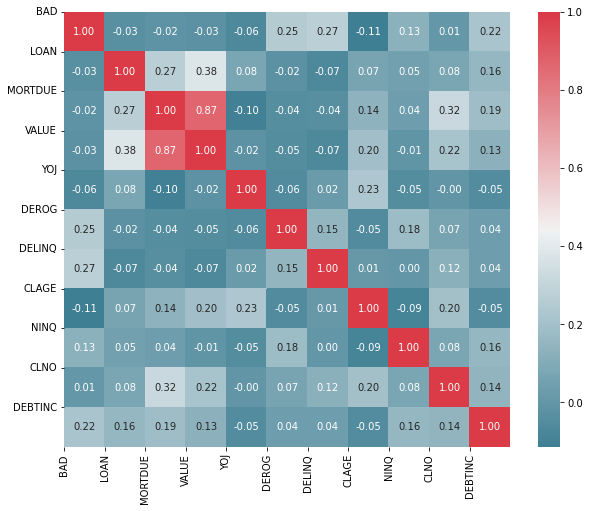

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
df=pd.get_dummies(df, columns=['REASON','JOB'])
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


In [ ]:
X = df.drop(['BAD'], axis=1)
y = df['BAD']

In [ ]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [ ]:
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=4, step=1)
fit = rfe.fit(X, y)
no_of_features = fit.n_features_
support_features = fit.support_
ranking_features = fit.ranking_
print("Num Features: %d" % (no_of_features))
print("Selected Features: %s" % (support_features))
print("Feature Ranking: %s" % (ranking_features))
X_sub = X.iloc[:,support_features]

Num Features: 4
Selected Features: [False False False False  True  True  True False False  True False False
 False False False False False False]
Feature Ranking: [ 6  8  7 10  1  1  1  4  3  1 11 14 12  2 13 15  5  9]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sub,y,random_state = 0)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)
y_score= classifier.predict_proba(X_test)

In [ ]:
acs=accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred, average='macro') 
ps=precision_score(y_test,y_pred, average='macro') 
print("---Classification Report of Logistic Regression---")
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
print(classification_report(y_test, y_pred))

---Classification Report of Logistic Regression---
accuracy score :  0.906064209274673
precision score :  0.5801866256457886
recall score :  0.8944531696173614
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       749
           1       0.88      0.16      0.28        92

    accuracy                           0.91       841
   macro avg       0.89      0.58      0.61       841
weighted avg       0.90      0.91      0.88       841



In [ ]:
def plot_confusion_matrix(cm,classes=[0,1],title='Confusion matrix without normalization', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[747   2]
 [ 77  15]]


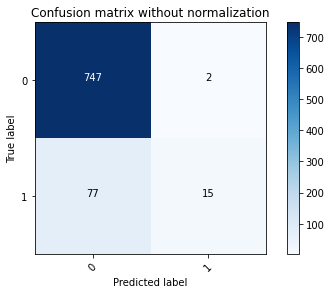

In [ ]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

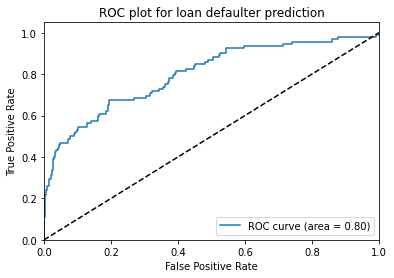

In [ ]:
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_test, y_score)

In [ ]:
model=DecisionTreeClassifier()
param_dict={'min_samples_split' : range(10,500,20),'max_depth': np.arange(3, 10)}
best_model=GridSearchCV(model,param_dict, cv=5)
best_model.fit(X, y)
best_model.best_params_ 
best_model.best_score_ 
ypred = best_model.predict(X)
y_score= best_model.predict_proba(X)
acs=accuracy_score(y,ypred) 
rs=recall_score(y,ypred, average='macro')  
ps=precision_score(y,ypred, average='macro') 
print("---Classification Report of Decision Tree---")
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

---Classification Report of Decision Tree---
accuracy score :  0.937871581450654
precision score :  0.665197998259356
recall score :  0.927993630124438


Confusion matrix without normalization
[[3055    9]
 [ 200  100]]


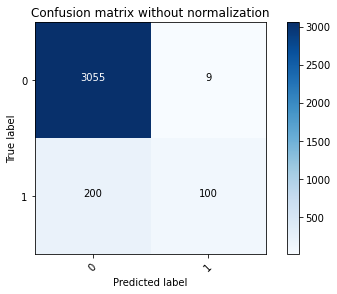

In [ ]:
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

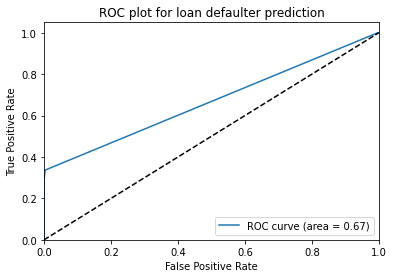

In [ ]:
plot_roc(y,y_score)

DEBTINC           0.323340
VALUE             0.114641
LOAN              0.104152
CLAGE             0.095817
DELINQ            0.084430
CLNO              0.072433
DEROG             0.050303
MORTDUE           0.042859
YOJ               0.037478
NINQ              0.028906
JOB_Office        0.014312
REASON_DebtCon    0.008514
JOB_Other         0.007538
JOB_Mgr           0.007245
REASON_HomeImp    0.004192
JOB_Sales         0.003839
JOB_ProfExe       0.000000
JOB_Self          0.000000
dtype: float64


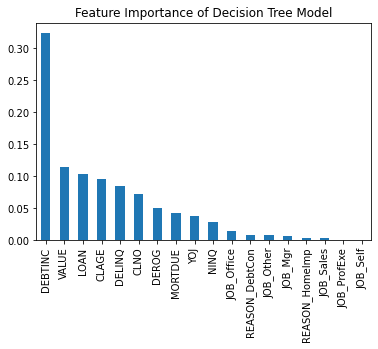

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #
model=DecisionTreeClassifier()
model.fit(X_train, y_train) 
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', title='Feature Importance of Decision Tree Model')

In [ ]:
model=RandomForestClassifier(n_jobs=-1)
param_dict = { 'n_estimators':[5,10,15],
               'max_depth':[50,60,70],
               'criterion': ['gini','entropy']
              }
best_model = GridSearchCV(model, param_dict, cv=5) 
best_model.fit(X, y)
best_model.best_params_ 
best_model.best_score_
ypred = best_model.predict(X)
y_score= best_model.predict_proba(X)

In [ ]:
acs=accuracy_score(y,ypred) 
rs=recall_score(y,ypred, average='macro') 
ps=precision_score(y,ypred, average='macro')
print("---Classification Report of Random Forest---")
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

---Classification Report of Random Forest---
accuracy score :  0.9937574316290131
precision score :  0.9650000000000001
recall score :  0.9965964343598055


Confusion matrix without normalization
[[3064    0]
 [  21  279]]


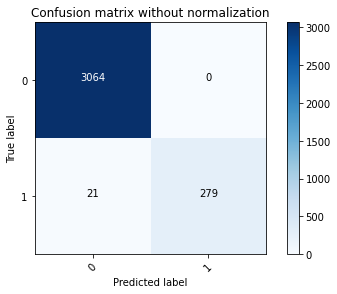

In [ ]:
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

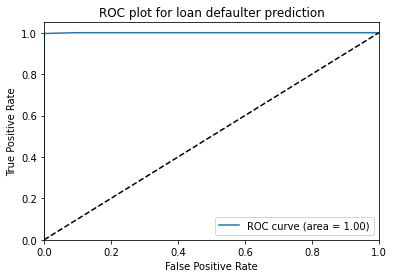

In [ ]:
plot_roc(y,y_score)

DEBTINC           0.267726
CLAGE             0.102549
DELINQ            0.095182
VALUE             0.089243
MORTDUE           0.081318
CLNO              0.077551
LOAN              0.075693
YOJ               0.051737
DEROG             0.048689
NINQ              0.046128
JOB_Other         0.010343
JOB_Sales         0.010098
JOB_Office        0.009332
JOB_Mgr           0.009285
REASON_DebtCon    0.007762
REASON_HomeImp    0.007534
JOB_ProfExe       0.005675
JOB_Self          0.004153
dtype: float64


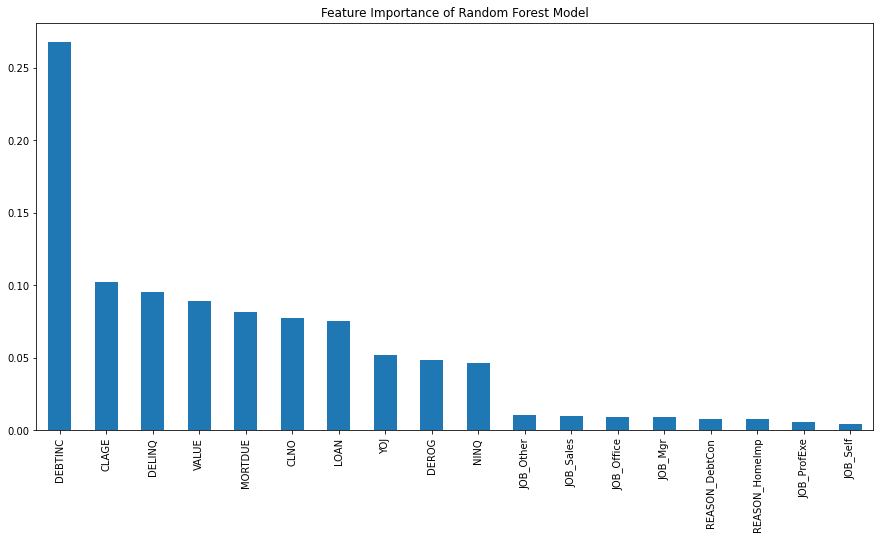

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', figsize=(15,7.5),title='Feature Importance of Random Forest Model')